In [1]:
%matplotlib inline

In [30]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import normalize
from msslib.utils import *
from msslib.data import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import functools as f
import random

In [3]:
unwanted_recto = ["VA223RN","VA327RN","VA001RN","VA002RN","VA006RN","VA007RN","VA008RN","VA009RN"]

def get_set_paths(directory):
    return sorted(list(filter(lambda x: "RN" in x and not any(s in x for s in unwanted_recto) , listpaths(directory))))


In [86]:
def scatter_4_dims(v, cols, colours):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
    #ax1.axis([-1,-1,1,1])
    ax1.scatter(v[0], v[1],c=cols, alpha=0.5)
    ax1.set_ylabel("Element 1")
    #ax2.axis([-1,-1,1,1])
    ax2.scatter(v[3], v[1],c=cols, alpha=0.5)
    #ax3.axis([-1,-1,1,1])
    ax3.set_ylabel("Element 2")
    ax3.set_xlabel("Element 3")
    ax3.scatter(v[0], v[2],c=cols, alpha=0.5)
    #ax4.axis([-1,-1,1,1])
    ax4.set_xlabel("Element 4")
    ax4.scatter(v[3], v[2],c=cols, alpha=0.5)
    f.tight_layout()
    f.legend([mpatches.Patch(color=c, label=l) for c,l in zip(colours, mss_labels)], 
             mss_labels, loc=9, bbox_to_anchor=(0.6, 0.6))
    return f

In [5]:
label_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/labels/"
data_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/data/"

label_paths = get_set_paths(label_dir)
data_paths = get_set_paths(data_dir)

path_pairs = list(zip(label_paths, data_paths))
print(len(path_pairs))

150


In [6]:
# I'm training LDA on this as well as the random test set to ensure I always get the same number of classes
lda_data_path = "/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/data/VA013RN-0014.npy"
lda_label_path = "/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/labels/VA013RN-0014.npy"
lda_X = flatten_vector_matrix(np.load(lda_data_path))
lda_y = np.squeeze(flatten_vector_matrix(np.load(lda_label_path)))

In [7]:
split_at = 20
random.shuffle(path_pairs)
train = path_pairs[:split_at]

lda = LinearDiscriminantAnalysis(n_components=4)
pca = PCA(n_components=4)
lda.fit(lda_X, lda_y)
pca.fit(lda_X)
for l, d in train:
    X = flatten_vector_matrix(np.load(d))
    y = np.squeeze(flatten_vector_matrix(np.load(l)))
    pca.fit(X)
    lda.fit(X, y)

/usr/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [8]:
path = path_pairs[60][1]
data = flatten_vector_matrix(np.load(path))

p_d = pca.transform(X)
l_d = lda.transform(X)

In [31]:
p_rot = np.rot90(p_d)
l_rot = np.rot90(l_d)

p_norm = normalize(p_rot)
l_norm = normalize(l_rot)

In [10]:
colours = ['red','blue','green','yellow','purple']
cols = [colours[int(i)] for i in y]


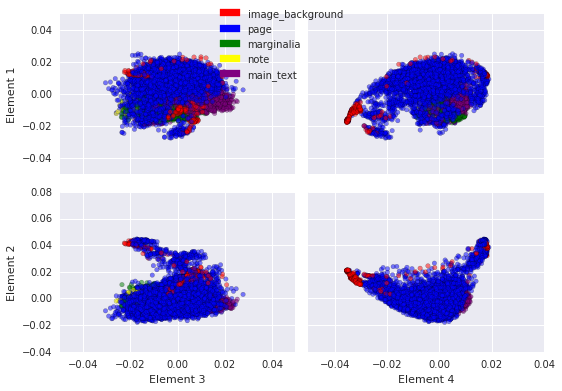

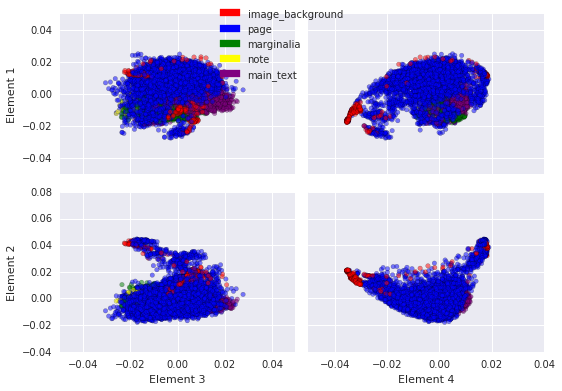

In [78]:
scatter_4_dims(p_norm, cols, colours)

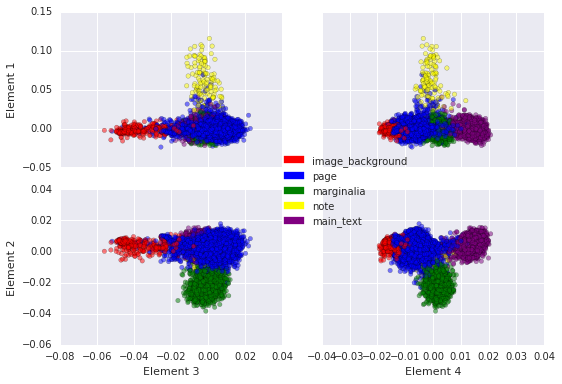

In [87]:
lda_f =scatter_4_dims(l_norm, cols, colours)

In [90]:
lda_f.savefig('/home/finlay/for_report/lda.pdf')

array([[ 76.77994729,  45.45660097,  86.53729297, ...,  21.01775162,
         33.43487298,  15.86526313],
       [ 76.14310603,  71.1289471 ,  43.45276982, ...,  39.53777653,
         17.51260159,  31.43328678],
       [ 78.78573169,  73.51475362,  32.90363962, ...,  78.33726701,
         29.07609001,  32.77725493],
       ..., 
       [ 79.15321947,  24.10587314,  26.487696  , ...,  19.35414096,
         54.74550095,  37.94553789],
       [ 78.81494283,  32.31212546,  29.69396764, ...,  49.904268  ,
         24.03644594,  44.76948004],
       [ 77.71529982,  37.60370114,  40.42240091, ...,  49.10282923,
         30.54834267,  61.27983848]])

In [59]:
np.random.shuffle(y)

In [64]:
data

array([[   1.02509365,  293.05706124,  107.99691276, ...,   25.29014537,
          55.61404961,  160.0439922 ],
       [   1.37518249,  161.96134891,  124.86596929, ...,   43.96783235,
          63.78388113,   76.14541764],
       [   0.51176232,   13.16312805,    3.95633169, ...,    4.91874294,
           3.06142142,    6.50101423],
       ..., 
       [  14.86359795,  157.12003495,  113.11590724, ...,   49.35329242,
          68.77765645,   78.6534144 ],
       [  42.6549866 ,  270.06414112,  176.54406528, ...,   44.46752402,
          81.57757547,  123.75141572],
       [  42.11477934,  308.69850347,  143.9630551 , ...,   53.19878719,
          58.80519285,  126.19341431]])

In [71]:
l,d = path_pairs[70]
X = flatten_vector_matrix(np.load(d))
y = np.squeeze(flatten_vector_matrix(np.load(l)))

In [69]:
np.random.choice(X, axis=0)

TypeError: choice() got an unexpected keyword argument 'axis'

In [ ]:
def sample_N(arr, n=10):
    if arr.shape[0] <= n:
        return arr
    else:
        return arr[np.random.choice(arr.shape[0], n)]
    
def 

array([[  2.90079072e-13,   8.52297386e+00,   4.50125296e+00, ...,
          2.06037969e+00,   5.90177746e+00,   2.34639022e+00],
       [  1.58806301e-13,   5.69257240e+01,   1.04920923e+01, ...,
          4.80716862e+00,   7.76850420e+00,   3.15191328e+01],
       [  2.32880382e-13,   8.49147338e+00,   4.14481005e+00, ...,
          2.93181003e+00,   4.41798556e+00,   2.42757458e+00],
       ..., 
       [  2.60413913e-13,   2.92455799e+01,   2.63080676e+01, ...,
          6.43018462e+00,   1.07385590e+01,   9.99766365e+00],
       [  2.52953214e-13,   2.57467036e+01,   7.69837676e+00, ...,
          9.02649767e+00,   9.40339345e+00,   1.34258530e+01],
       [  2.60413913e-13,   2.92455799e+01,   2.63080676e+01, ...,
          6.43018462e+00,   1.07385590e+01,   9.99766365e+00]])